In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples

--2024-01-07 07:32:31--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2024-01-07 07:32:31 ERROR 400: Bad Request.



In [6]:
#Load data
data = pd.read_csv('/content/drive/MyDrive/PyTorch Projects/moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

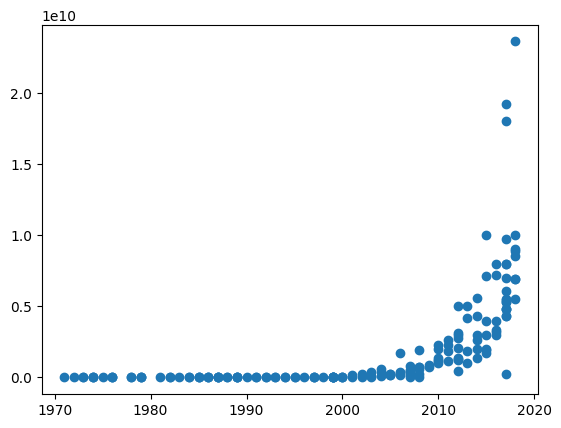

In [7]:
#Plot the data
plt.scatter(X, Y)

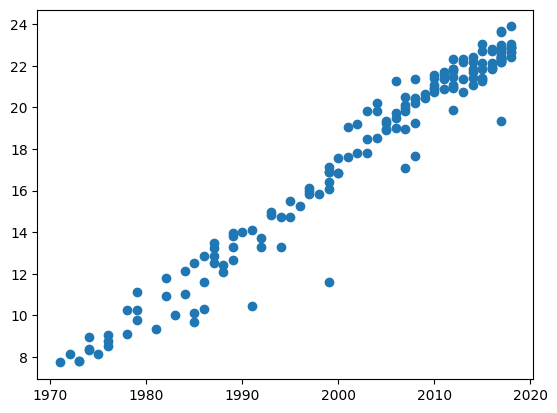

In [8]:
#We want linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [9]:
#Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X-mx)/sx
Y = (Y-my)/sy

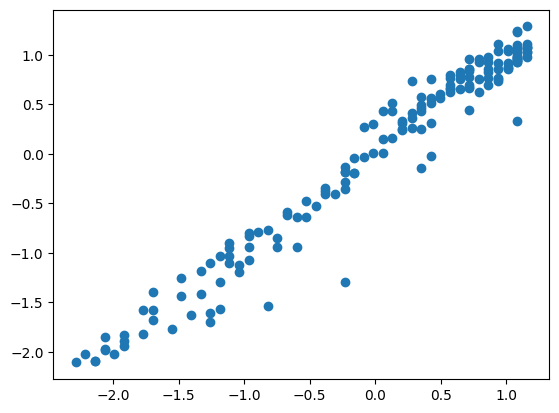

In [10]:
#Everything is scaled and centered
plt.scatter(X, Y)

In [11]:
#Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [12]:
#Create the linear regression model
model = nn.Linear(1, 1)

In [19]:
#Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [20]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [21]:
type(inputs)

torch.Tensor

In [22]:
#Train Model
n_epochs = 100
losses = []

for it in range(n_epochs):
  #zero the parameter gradients
  optimizer.zero_grad()

  #Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  #Record losses
  losses.append(loss.item())

  #Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch{it+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch1/100, Loss: 0.9695
Epoch2/100, Loss: 0.9327
Epoch3/100, Loss: 0.8724
Epoch4/100, Loss: 0.7993
Epoch5/100, Loss: 0.7210
Epoch6/100, Loss: 0.6427
Epoch7/100, Loss: 0.5679
Epoch8/100, Loss: 0.4985
Epoch9/100, Loss: 0.4356
Epoch10/100, Loss: 0.3794
Epoch11/100, Loss: 0.3299
Epoch12/100, Loss: 0.2866
Epoch13/100, Loss: 0.2492
Epoch14/100, Loss: 0.2170
Epoch15/100, Loss: 0.1894
Epoch16/100, Loss: 0.1658
Epoch17/100, Loss: 0.1458
Epoch18/100, Loss: 0.1288
Epoch19/100, Loss: 0.1144
Epoch20/100, Loss: 0.1023
Epoch21/100, Loss: 0.0921
Epoch22/100, Loss: 0.0835
Epoch23/100, Loss: 0.0762
Epoch24/100, Loss: 0.0701
Epoch25/100, Loss: 0.0650
Epoch26/100, Loss: 0.0607
Epoch27/100, Loss: 0.0571
Epoch28/100, Loss: 0.0541
Epoch29/100, Loss: 0.0516
Epoch30/100, Loss: 0.0494
Epoch31/100, Loss: 0.0476
Epoch32/100, Loss: 0.0462
Epoch33/100, Loss: 0.0449
Epoch34/100, Loss: 0.0439
Epoch35/100, Loss: 0.0430
Epoch36/100, Loss: 0.0423
Epoch37/100, Loss: 0.0416
Epoch38/100, Loss: 0.0411
Epoch39/100, Loss: 0.

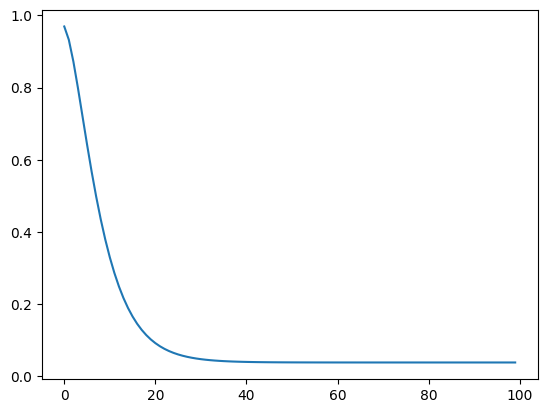

In [23]:
#Loss per iteration
plt.plot(losses)

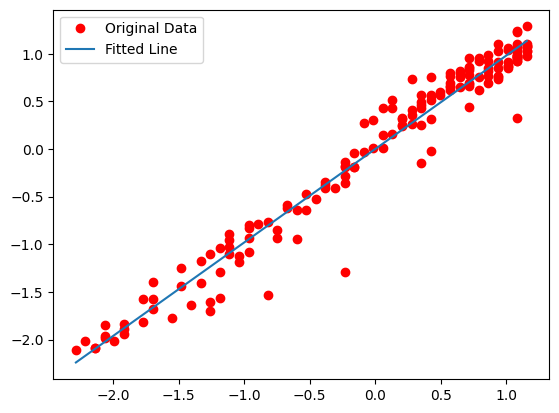

In [25]:
#Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label = 'Original Data')
plt.plot(X, predicted,  label = 'Fitted Line')
plt.legend()
plt.show()

In [26]:
#weight
w = model.weight.data.numpy()
print(w)

[[0.9803934]]


In [27]:
#The coeffient of X in fitted line
a = w[0,0]*sy/sx
print(a)

0.3416205627202567
